In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.patches import Patch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import scipy

In [2]:
data = pd.read_csv("/dccstor/ipc1/CAR/Data/DREAM_data/all_cl_time_aligned.csv")

In [3]:
data

,treatment,cell_line,time,cellID,fileID,b.CATENIN,cleavedCas,CyclinB,GAPDH,IdU,...,p.PLCg2,p.RB,p.S6,p.S6K,p.SMAD23,p.SRC,p.STAT1,p.STAT3,p.STAT5,time_course
0,EGF,HCC1428,0.0,1,29,2.277863,1.577461,2.515730,2.965038,6.90317,...,4.419839,3.26107,7.03802,2.462533,1.597266,3.838360,4.049111,0.652426,3.305500,A
1,EGF,HCC1428,0.0,1,95,0.829853,1.953114,2.446810,3.426870,6.80673,...,3.198912,3.98929,3.41358,2.541979,2.594581,2.234090,2.796784,2.005433,3.396518,B
2,EGF,HCC1428,0.0,2,29,1.746819,3.045100,1.635950,2.459020,6.06703,...,2.809153,2.21759,3.31012,0.331558,1.669024,3.150189,3.229133,0.652426,3.241775,A
3,EGF,HCC1428,0.0,2,95,1.845799,3.538038,3.041430,2.508841,5.71532,...,3.177542,2.81194,7.28994,1.817634,2.223754,2.449400,3.094784,2.137521,3.303891,B
4,EGF,HCC1428,0.0,3,29,0.739657,3.386717,1.574390,3.104396,6.20346,...,2.596193,5.30232,4.63872,2.318320,2.303349,2.829673,2.343361,0.652426,2.180254,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23131339,iPKC,T47D,60.0,3885,4444,0.796624,2.817705,2.708316,2.649728,5.30164,...,2.408345,2.71991,6.08711,1.649240,2.360670,2.825340,3.027605,2.544341,2.909578,B
23131340,iPKC,T47D,60.0,3886,4444,2.080326,3.073579,2.283993,4.164062,4.36651,...,3.454036,1.65488,8.32390,1.800680,2.093250,2.999610,3.747098,1.558878,2.663090,B
23131341,iPKC,T47D,60.0,3887,4444,0.796624,3.327099,2.626595,2.826593,5.32818,...,3.095702,2.12746,7.71649,2.712010,1.918540,2.640700,3.471636,2.576593,3.053585,B
23131342,iPKC,T47D,60.0,3888,4444,0.796624,2.488476,2.830036,3.098706,5.44272,...,2.801503,1.65488,7.86357,2.232220,2.026130,2.833090,3.484447,0.576076,2.616188,B


In [4]:
data["time"].unique()

array([ 0. ,  5.5,  7. ,  9. , 13. , 17. , 23. , 30. , 40. , 60. ])

In [5]:
ident_cols = ["treatment", "cell_line", "time", "cellID", "fileID", "time_course"]
group_cols = ["treatment", "cell_line", "time"]
markers = [c for c in data.columns if not c in ident_cols]

In [6]:
avg_data = data.groupby(group_cols).mean()[markers].reset_index(drop=False)
plt_data = avg_data.melt(id_vars=group_cols, value_vars=markers, value_name="Expression", var_name="Marker")
plt_data

/tmp/ipykernel_3509750/2196023352.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_data = data.groupby(group_cols).mean()[markers].reset_index(drop=False)


,treatment,cell_line,time,Marker,Expression
0,EGF,184A1,0.0,b.CATENIN,1.196279
1,EGF,184A1,5.5,b.CATENIN,1.061006
2,EGF,184A1,7.0,b.CATENIN,1.066766
3,EGF,184A1,9.0,b.CATENIN,1.247629
4,EGF,184A1,13.0,b.CATENIN,1.153863
...,...,...,...,...,...
85983,iPKC,ZR7530,9.0,p.STAT5,2.896443
85984,iPKC,ZR7530,13.0,p.STAT5,2.886725
85985,iPKC,ZR7530,17.0,p.STAT5,2.744360
85986,iPKC,ZR7530,40.0,p.STAT5,2.783426


<AxesSubplot: xlabel='time', ylabel='Expression'>

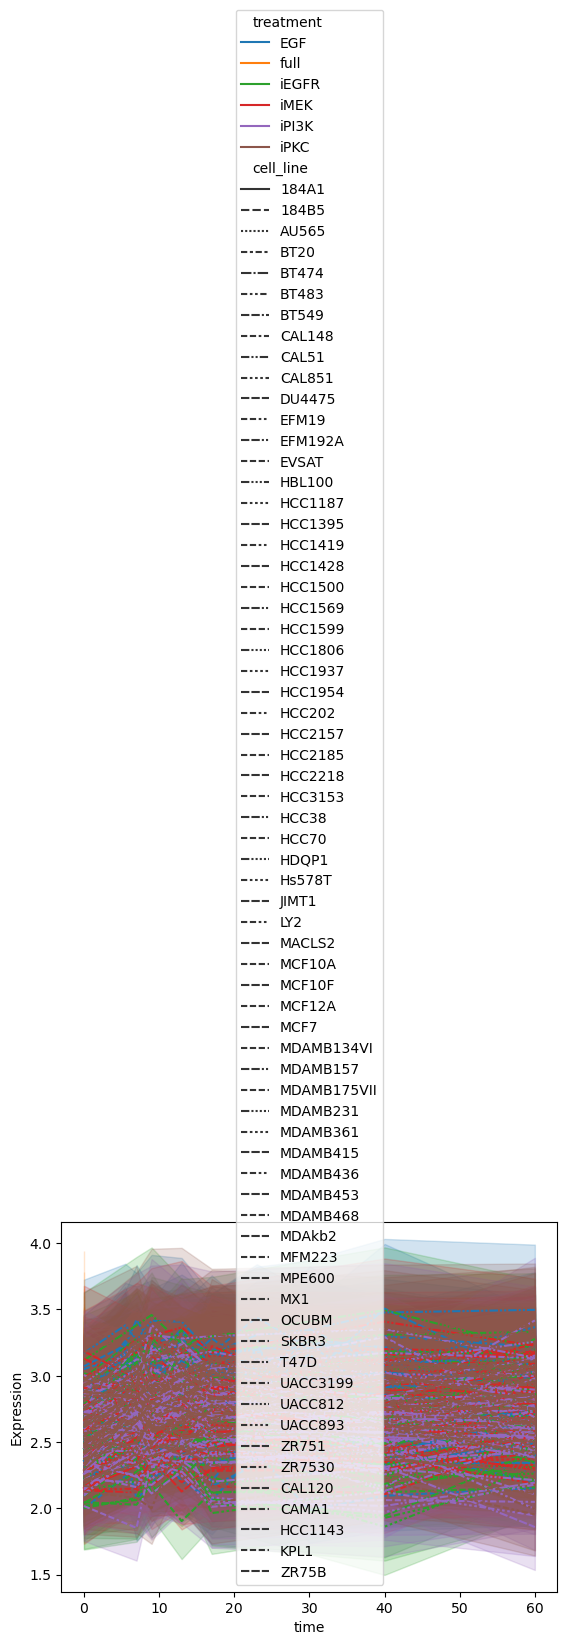

In [7]:
sns.lineplot(data=plt_data, x="time", y="Expression", hue="treatment", style="cell_line")

<AxesSubplot: xlabel='time', ylabel='Expression'>

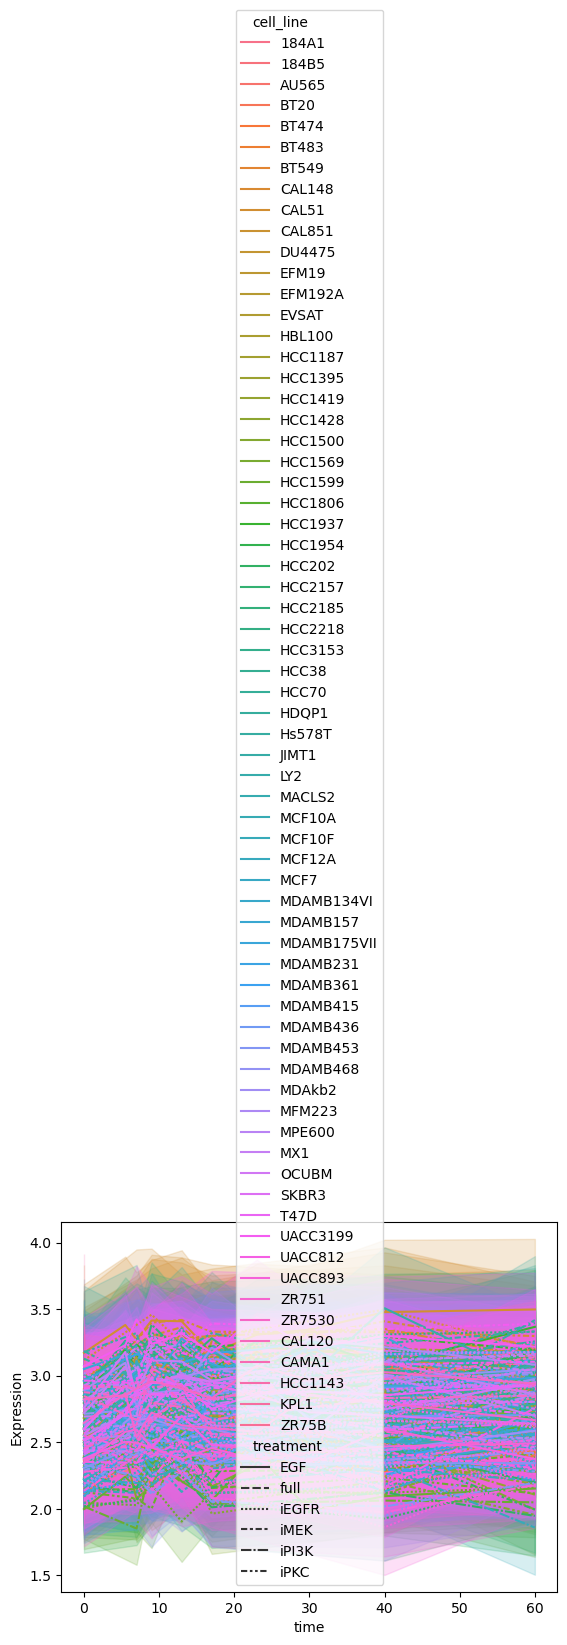

In [8]:
sns.lineplot(data=plt_data, x="time", y="Expression", hue="cell_line", style="treatment")

<AxesSubplot: xlabel='time', ylabel='Expression'>

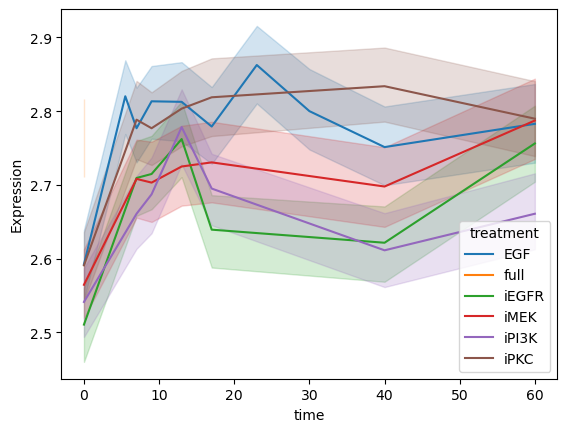

In [9]:
sns.lineplot(data=plt_data, x="time", y="Expression", hue="treatment")

<AxesSubplot: xlabel='time', ylabel='Expression'>

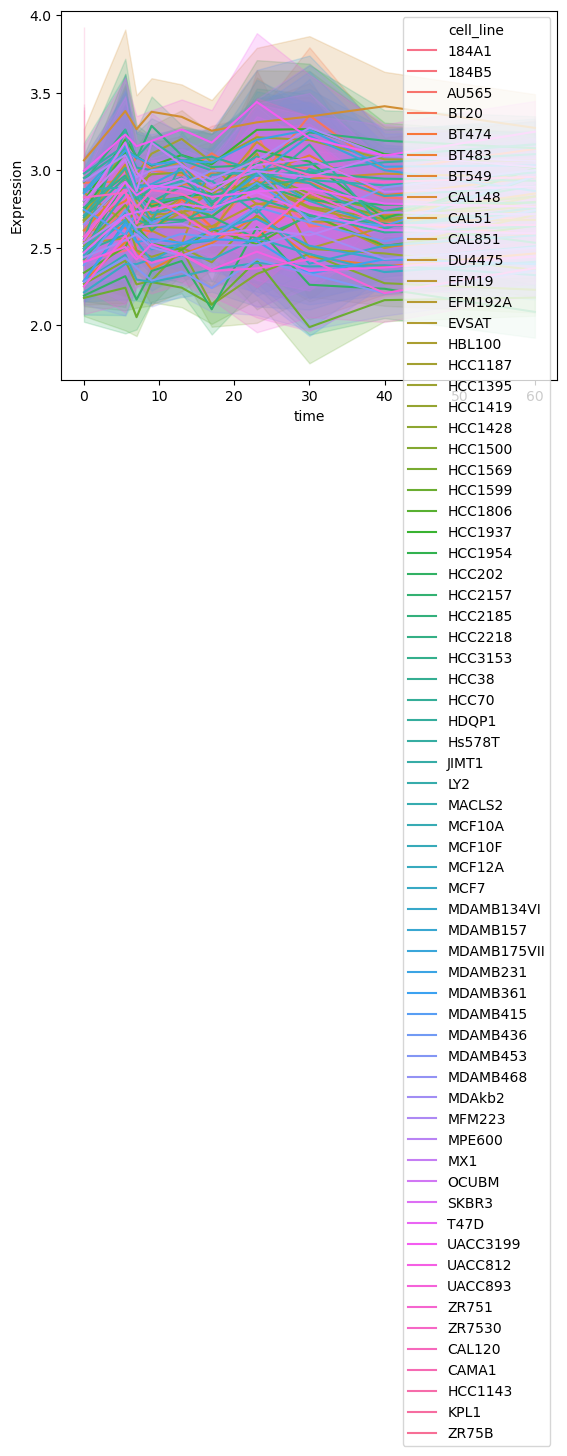

In [10]:
sns.lineplot(data=plt_data, x="time", y="Expression", hue="cell_line")

# 

In [11]:
temp = data.groupby(["time", "treatment", "cell_line"]).size().reset_index(drop=False)#[data.groupby(["time", "treatment", "cell_line"]).size().reset_index(drop=False)["time"].isin([9.0, 13.0])]
temp

,time,treatment,cell_line,0
0,0.0,EGF,184A1,15512
1,0.0,EGF,184B5,15760
2,0.0,EGF,AU565,15120
3,0.0,EGF,BT20,18525
4,0.0,EGF,BT474,16048
...,...,...,...,...
2319,60.0,iPKC,UACC3199,6164
2320,60.0,iPKC,UACC812,5664
2321,60.0,iPKC,UACC893,7513
2322,60.0,iPKC,ZR751,5754


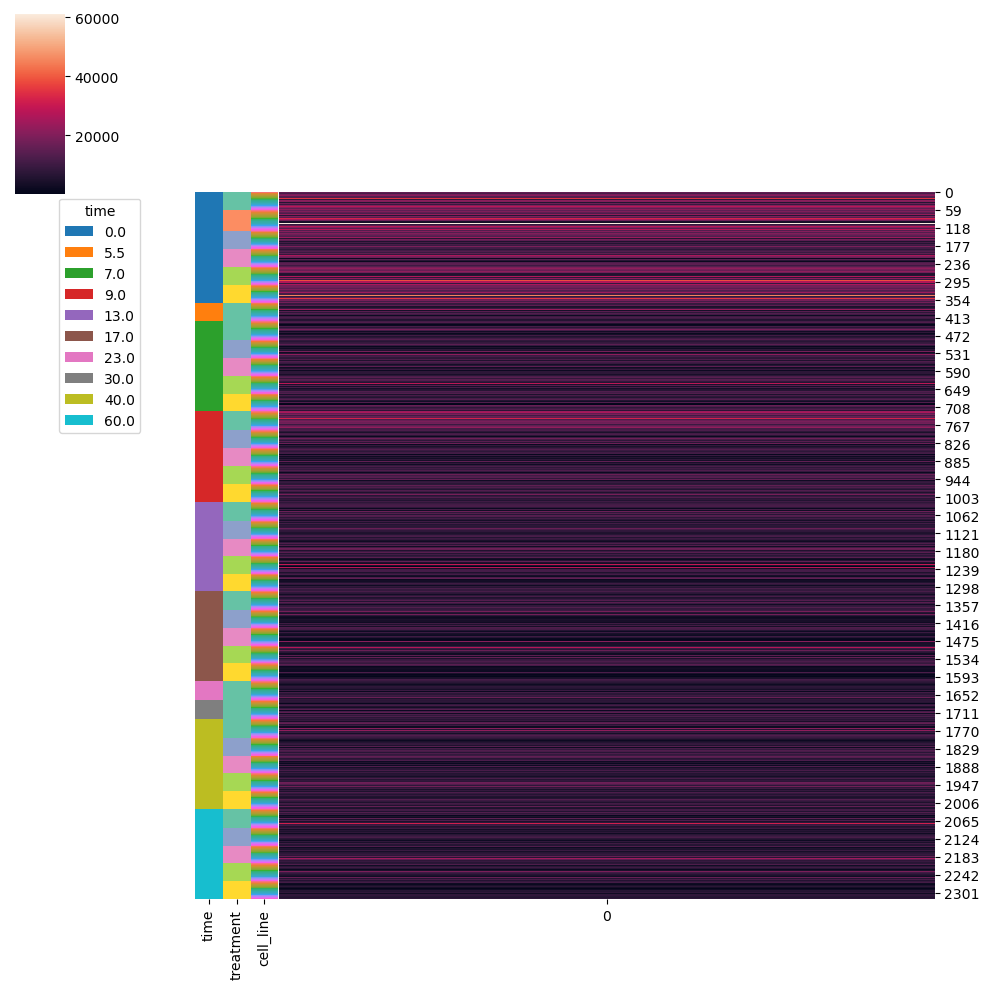

In [12]:
lut = dict(zip(temp["time"].unique(), sns.color_palette()))
row_colors1 = temp["time"].map(lut)

lut2 = dict(zip(temp["treatment"].unique(), sns.color_palette("Set2")))
row_colors2 = temp["treatment"].map(lut2)

lut3 = dict(zip(temp["cell_line"].unique(), sns.color_palette("husl", len(temp["cell_line"].unique()))))
row_colors3 = temp["cell_line"].map(lut3)

row_colors = pd.concat([row_colors1, row_colors2, row_colors3], axis=1)

g = sns.clustermap(temp[0], row_cluster=False, col_cluster=False, row_colors=row_colors)

handles = [Patch(facecolor=lut[name]) for name in lut]
l=g.ax_heatmap.legend(loc='upper right',bbox_to_anchor=(-0.2,1), handles=handles, labels=lut.keys())
l.set_title(title='time',prop={'size':10})

# handles = [Patch(facecolor=lut2[name]) for name in lut2]
# l2=g.ax_heatmap.legend(loc='upper right',bbox_to_anchor=(-0.1,1), handles=handles, labels=lut2.keys())
# l2.set_title(title='treatment',prop={'size':10})

# handles = [Patch(facecolor=lut3[name]) for name in lut3]
# l3=g.ax_heatmap.legend(loc='upper right',bbox_to_anchor=(-0.1,1), handles=handles, labels=lut3.keys())
# l3.set_title(title='cell_line',prop={'size':10})

In [13]:
data.groupby(["time", "time_course"]).size().reset_index(drop=False)

,time,time_course,0
0,0.0,A,3077573
1,0.0,B,2938332
2,5.5,A,606337
3,7.0,B,2556257
4,9.0,A,2684946
5,9.0,B,533453
6,13.0,A,2592075
7,13.0,B,7075
8,17.0,A,22917
9,17.0,B,2384104


# Marker distrubions

In [7]:
def fit_distribution(df, column, dist_names, n_bins =11):
    # Set up list of candidate distributions to use
    # See https://docs.scipy.org/doc/scipy/reference/stats.html for more
    y_std = list(df[column])
    size = len(df[column])
    
    chi_square_statistics = []
    # 11 bins
    bins = pd.cut(df[column], n_bins).cat.categories
    cum_observed_frequency = list((pd.cut(df[column], n_bins)).value_counts())
    percentile_cutoffs = [bins[0].left]+[iv.right for iv in bins]

    # Loop through candidate distributions

    for distribution in dist_names:
        # Set up distribution and get fitted distribution parameters
        dist = getattr(scipy.stats, distribution)
        param = dist.fit(y_std)

        # Get expected counts in percentile bins
        # cdf of fitted sistrinution across bins
        cdf_fitted = dist.cdf(percentile_cutoffs, *param)
        expected_frequency = []
        for bin_ in range(n_bins):
            expected_cdf_area = cdf_fitted[bin_+1] - cdf_fitted[bin_]
            expected_frequency.append(expected_cdf_area)
            
        # Chi-square Statistics
        expected_frequency = np.array(expected_frequency) * size
        cum_expected_frequency = np.cumsum(expected_frequency)
        
        ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
        chi_square_statistics.append(ss)

    return chi_square_statistics
#     #Sort by minimum ch-square statistics
#     results = pd.DataFrame()
#     results['Distribution'] = dist_names
#     results['chi_square'] = chi_square_statistics
#     results.sort_values(['chi_square'], inplace=True)


#     print ('\nDistributions listed by Betterment of fit:')
#     print ('............................................')
#     print (results)

In [8]:
temp_data = data[data["time"]==9.0]
print(temp_data[["treatment", "cell_line"]].drop_duplicates().shape)
temp_data

(297, 2)


,treatment,cell_line,time,cellID,fileID,b.CATENIN,cleavedCas,CyclinB,GAPDH,IdU,...,p.PLCg2,p.RB,p.S6,p.S6K,p.SMAD23,p.SRC,p.STAT1,p.STAT3,p.STAT5,time_course
36615,EGF,HCC1428,9.0,1,32,1.989643,2.217251,2.770060,3.186393,6.12244,...,3.237177,3.20553,7.10204,2.964160,3.237724,3.804958,3.495319,1.846053,3.090557,A
36616,EGF,HCC1428,9.0,1,103,1.170017,1.668091,1.478960,1.388389,7.16667,...,0.986227,2.40814,2.84983,1.371523,1.018069,2.454346,1.685171,1.532128,2.272703,B
36617,EGF,HCC1428,9.0,2,32,0.224784,1.600617,1.204890,0.565534,11.09300,...,1.398119,2.20794,2.39632,0.331558,1.593318,0.846149,1.067839,0.652426,0.033632,A
36618,EGF,HCC1428,9.0,2,103,0.868811,1.015928,1.204890,0.565534,5.30651,...,1.578748,2.20794,4.32020,0.933084,0.551474,2.084248,2.122224,1.358797,1.985103,B
36619,EGF,HCC1428,9.0,3,32,0.570553,2.233290,1.204890,1.081502,6.06449,...,1.652624,3.11783,5.03960,1.504052,1.848797,2.703560,2.477394,0.652426,2.357887,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23107513,iPKC,T47D,9.0,7073,4426,1.639215,1.589809,0.815259,1.888767,5.00026,...,2.183890,1.72307,4.96441,2.287280,0.158009,2.343380,3.062358,1.664678,2.742400,A
23107514,iPKC,T47D,9.0,7074,4426,1.372076,1.375895,1.454634,1.981440,5.60722,...,3.590258,5.97002,6.28003,1.897720,2.147410,2.475190,2.476393,2.723982,2.612892,A
23107515,iPKC,T47D,9.0,7075,4426,0.796624,3.060431,2.880592,2.935522,5.57593,...,1.432960,4.14978,3.85457,1.568530,2.323090,1.479250,4.857231,0.901145,1.079905,A
23107516,iPKC,T47D,9.0,7076,4426,0.796624,2.331294,2.087152,4.111361,4.86192,...,3.010941,1.65488,6.04579,2.311480,1.927340,2.639920,3.208201,2.375648,3.260081,A


In [150]:
# # Exclude cell lines for which we don't have all treatments
# excl_cl = data[["cell_line", "treatment"]].drop_duplicates().groupby("cell_line").size()[data[["cell_line", "treatment"]].drop_duplicates().groupby("cell_line").size()<6].index.values
# cell_lines = [cl for cl in data["cell_line"].unique() if cl not in excl_cl]
# cell_lines

['HCC70',
 'AU565',
 'BT20',
 'MDAMB415',
 'HCC2157',
 'MCF10F',
 'MDAMB436',
 'BT474',
 'MCF7',
 'MDAMB175VII',
 'MCF10A',
 'UACC812',
 'ZR7530',
 'HCC3153',
 'EFM19',
 'CAL51',
 'MACLS2',
 'CAL851',
 'EFM192A',
 'HBL100',
 'LY2',
 'MPE600',
 'CAL148',
 'HDQP1',
 'EVSAT',
 'MDAMB157',
 'HCC2218',
 'HCC1599',
 'HCC2185',
 'DU4475',
 'OCUBM',
 '184A1',
 'JIMT1',
 'MX1',
 'MFM223',
 'MDAMB453',
 'HCC1187',
 'HCC1419',
 'HCC1500',
 'HCC1395',
 'HCC1937',
 'BT549',
 'HCC1954',
 'MDAkb2',
 'MDAMB134VI',
 'HCC38',
 'MDAMB361',
 'HCC1569',
 'UACC893',
 'T47D']

In [15]:
sel_cl = ['HCC70',
 'AU565',
 'BT20']

In [16]:
sel_markers = [m for m in markers if not m in ["p.HER2", "p.PLCg2"]]

In [20]:
dist_names = ['weibull_min','norm','weibull_max','beta',
                 'invgauss','uniform','gamma','expon', 'lognorm','pearson3','triang']
all_stats = []
all_cl = []
all_treatments = []
all_markers = []
all_dists = []
for cell_line in sel_cl:
    cl_data = temp_data[temp_data["cell_line"]==cell_line]
    for treatment in cl_data["treatment"].unique():
        print(cell_line, treatment)
        sel_data = cl_data[cl_data["treatment"]==treatment]
        
        scaler = MinMaxScaler()
        minmax_data = sel_data.copy()
        minmax_data[sel_markers] = scaler.fit_transform(sel_data[sel_markers])
        
        for marker in sel_markers:
            stats = fit_distribution(minmax_data, column=marker, dist_names=dist_names)
            all_stats.append(stats)
            all_cl.append([cell_line]*len(dist_names))
            all_treatments.append([treatment]*len(dist_names))
            all_markers.append([marker]*len(dist_names))
            all_dists.append(dist_names)
res = pd.DataFrame({"chi_squared": [ss for ss_list in all_stats for ss in ss_list], 
                    "cell_line": [cl for cl_list in all_cl for cl in cl_list],
                    "treatment": [t for t_list in all_treatments for t in t_list],
                    "marker": [m for m_list in all_markers for m in m_list], 
                    "distribution": [d for d_list in all_dists for d in d_list]})

HCC70 EGF


/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from th

HCC70 iEGFR


/tmp/ipykernel_3509750/1181757755.py:32: RuntimeWarning: divide by zero encountered in divide
  ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/tmp/ipykernel_3509750/1181757755.py:32: RuntimeWarning: divide by zero encountered in divide
  ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optim

HCC70 iMEK


/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from th

HCC70 iPI3K


/tmp/ipykernel_3509750/1181757755.py:32: RuntimeWarning: divide by zero encountered in divide
  ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/tmp/ipykernel_3

HCC70 iPKC


/tmp/ipykernel_3509750/1181757755.py:32: RuntimeWarning: divide by zero encountered in divide
  ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/tmp/ipykernel_3509750/1181757755.py:32: RuntimeWarning: divide by zero encountered in divide
  ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optimize/_minpac

AU565 EGF


/tmp/ipykernel_3509750/1181757755.py:32: RuntimeWarning: divide by zero encountered in divide
  ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/tmp/ipykernel_3509750/1181757755.py:32: RuntimeWarning: divide by zero encountered in divide
  ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/tmp/ipykernel_3509750/1181757755.py:32: RuntimeWarning: divide by zero encountered in divid

AU565 iEGFR


/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from th

AU565 iMEK


/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/tmp/ipykernel_3509750/1181757755.py:32: RuntimeWarning: divide by zero encountered in divide
  ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
/dccstor/ipc1/.c

AU565 iPI3K


/tmp/ipykernel_3509750/1181757755.py:32: RuntimeWarning: divide by zero encountered in divide
  ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/dccstor/ipc1/.c

AU565 iPKC


/tmp/ipykernel_3509750/1181757755.py:32: RuntimeWarning: divide by zero encountered in divide
  ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/dccstor/ipc1/.c

BT20 iEGFR


/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from th

BT20 iMEK


/tmp/ipykernel_3509750/1181757755.py:32: RuntimeWarning: divide by zero encountered in divide
  ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/tmp/ipykernel_3509750/1181757755.py:32: RuntimeWarning: divide by zero encountered in divide
  ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optimize/_minpac

BT20 iPI3K


/tmp/ipykernel_3509750/1181757755.py:32: RuntimeWarning: divide by zero encountered in divide
  ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/dccstor/ipc1/.c

BT20 iPKC


/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from th

In [21]:
res

,chi_squared,cell_line,treatment,marker,distribution
0,1.597495e+08,HCC70,EGF,b.CATENIN,weibull_min
1,9.113611e+07,HCC70,EGF,b.CATENIN,norm
2,1.025237e+08,HCC70,EGF,b.CATENIN,weibull_max
3,1.558507e+08,HCC70,EGF,b.CATENIN,beta
4,1.630358e+08,HCC70,EGF,b.CATENIN,invgauss
...,...,...,...,...,...
5770,2.246804e+07,BT20,iPKC,p.STAT5,gamma
5771,1.422601e+07,BT20,iPKC,p.STAT5,expon
5772,2.258130e+07,BT20,iPKC,p.STAT5,lognorm
5773,2.270748e+07,BT20,iPKC,p.STAT5,pearson3


In [ ]:
dist_names = ['weibull_min','norm','weibull_max','beta',
                 'invgauss','uniform','gamma','expon', 'lognorm','pearson3','triang']
all_stats = []
all_cl = []
all_treatments = []
all_markers = []
for cell_line in temp_data["cell_line"].unique():
    cl_data = temp_data[temp_data["cell_line"]==cell_line]
    for treatment in cl_data["treatment"].unique():
        print(cell_line, treatment)
        sel_data = cl_data[cl_data["treatment"]==treatment]
        
        scaler = StandardScaler()
        minmax_data = sel_data.copy()
        minmax_data[sel_markers] = scaler.fit_transform(sel_data[sel_markers])
        
        for marker in sel_markers:
            stats = fit_distribution(minmax_data, column=marker, dist_names=dist_names)
            all_stats.append(stats)
            all_cl.append(cell_line)
            all_treatments.append(treatment)
            all_markers.append(marker)
res2 = pd.DataFrame({"chi_squared": all_stats, 
                    "cell_line": all_cl,
                    "treatment": all_treatments,
                    "marker": all_markers})

In [ ]:
res.to_csv("/dccstor/ipc1/CAR/Data/DREAM_data/minmax_distributions_fitted.csv")
res2.to_csv("/dccstor/ipc1/CAR/Data/DREAM_data/stdscale_distributions_fitted.csv")

In [22]:
scaler = MinMaxScaler()
minmax_data = temp_data.copy()
minmax_data[markers] = scaler.fit_transform(temp_data[markers])
minmax_data.describe()

,time,cellID,fileID,b.CATENIN,cleavedCas,CyclinB,GAPDH,IdU,Ki.67,p.4EBP1,...,p.PDPK1,p.PLCg2,p.RB,p.S6,p.S6K,p.SMAD23,p.SRC,p.STAT1,p.STAT3,p.STAT5
count,15512.0,15512.000000,15512.000000,15512.000000,15512.000000,15512.000000,15512.000000,15512.000000,15512.000000,15512.000000,...,15512.000000,15512.000000,15512.000000,15512.000000,15512.000000,15512.000000,15512.000000,15512.000000,15512.000000,15512.000000
mean,0.0,3900.864685,2671.246970,0.321361,0.207259,0.110592,0.453688,0.106287,0.134265,0.238188,...,0.388022,0.153970,0.350896,0.318396,0.387335,0.372068,0.300442,0.459306,0.257575,0.333670
std,0.0,2277.335265,16.452883,0.231179,0.122315,0.132825,0.206720,0.122036,0.169968,0.242986,...,0.207490,0.159847,0.211115,0.199449,0.222998,0.198003,0.197287,0.141832,0.188097,0.108490
min,0.0,1.000000,2656.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,1939.750000,2656.000000,0.106035,0.116514,0.000000,0.320889,0.000000,0.000000,0.000000,...,0.244949,0.000000,0.182849,0.169309,0.222343,0.235381,0.154425,0.371274,0.089063,0.270997
50%,0.0,3878.500000,2656.000000,0.334307,0.218633,0.076300,0.476971,0.093984,0.063039,0.177021,...,0.407015,0.118351,0.345470,0.317636,0.405789,0.401437,0.298996,0.467124,0.258939,0.345179
75%,0.0,5817.250000,2689.000000,0.508081,0.299663,0.183266,0.608586,0.165842,0.225753,0.399647,...,0.546126,0.259410,0.526599,0.455901,0.564588,0.524882,0.426026,0.561726,0.399099,0.410556
max,0.0,8345.000000,2689.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
scaler = StandardScaler()
std_data = temp_data.copy()
std_data[markers] = scaler.fit_transform(temp_data[markers])
std_data.describe()

,time,cellID,fileID,b.CATENIN,cleavedCas,CyclinB,GAPDH,IdU,Ki.67,p.4EBP1,...,p.PDPK1,p.PLCg2,p.RB,p.S6,p.S6K,p.SMAD23,p.SRC,p.STAT1,p.STAT3,p.STAT5
count,15512.0,15512.000000,15512.000000,1.551200e+04,1.551200e+04,1.551200e+04,1.551200e+04,1.551200e+04,1.551200e+04,1.551200e+04,...,1.551200e+04,1.551200e+04,1.551200e+04,1.551200e+04,1.551200e+04,1.551200e+04,1.551200e+04,1.551200e+04,1.551200e+04,1.551200e+04
mean,0.0,3900.864685,2671.246970,1.832240e-17,1.062699e-16,2.601781e-16,3.664480e-17,2.940745e-16,-1.649016e-16,1.813918e-16,...,3.114808e-16,1.245923e-16,-1.887207e-16,7.970245e-17,-9.894097e-17,3.627836e-16,-1.190956e-16,-4.415699e-16,4.397376e-16,2.610942e-16
std,0.0,2277.335265,16.452883,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,...,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00
min,0.0,1.000000,2656.000000,-1.390140e+00,-1.694527e+00,-8.326416e-01,-2.194774e+00,-8.709745e-01,-7.899673e-01,-9.802816e-01,...,-1.870136e+00,-9.632663e-01,-1.662159e+00,-1.596430e+00,-1.736998e+00,-1.879166e+00,-1.522913e+00,-3.238479e+00,-1.369421e+00,-3.075676e+00
25%,0.0,1939.750000,2656.000000,-9.314574e-01,-7.419224e-01,-8.326416e-01,-6.424335e-01,-8.709745e-01,-7.899673e-01,-9.802816e-01,...,-6.895653e-01,-9.632663e-01,-7.960199e-01,-7.475201e-01,-7.399034e-01,-6.903507e-01,-7.401461e-01,-6.206945e-01,-8.959123e-01,-5.776991e-01
50%,0.0,3878.500000,2656.000000,5.599919e-02,9.299268e-02,-2.581834e-01,1.126334e-01,-1.008134e-01,-4.190657e-01,-2.517358e-01,...,9.153958e-02,-2.228367e-01,-2.569976e-02,-3.808229e-03,8.275751e-02,1.483298e-01,-7.330028e-03,5.512124e-02,7.250816e-03,1.060818e-01
75%,0.0,5817.250000,2689.000000,8.077073e-01,7.554846e-01,5.471623e-01,7.493373e-01,4.880300e-01,5.382868e-01,6.645006e-01,...,7.620119e-01,6.596524e-01,8.322924e-01,6.894449e-01,7.948886e-01,7.717999e-01,6.365769e-01,7.221420e-01,7.524203e-01,7.087159e-01
max,0.0,8345.000000,2689.000000,2.935645e+00,6.481348e+00,6.696322e+00,2.642851e+00,7.323604e+00,5.093690e+00,3.135306e+00,...,2.949531e+00,5.292931e+00,3.074745e+00,3.417547e+00,2.747487e+00,3.171429e+00,3.545999e+00,3.812333e+00,3.947160e+00,6.142041e+00


In [139]:
dist_names = ['weibull_min','norm','weibull_max','beta',
                 'invgauss','uniform','gamma','expon', 'lognorm','pearson3','triang']

stats = fit_distribution(minmax_data, column="CyclinB", dist_names=dist_names)

(0.8679948283025547, -1.4303208231818005e-30, 0.17548861036206292)

[8287, 3288, 2555, 931, 132, 76, 67, 65, 59, 35, 17]
[ 6695.34971325  9985.88338193 11936.49236813 13153.91272856
 13935.41857375 14442.18053589 14782.97731201 15011.62053184
 15166.42384074 15272.04119874 15344.57786625]
(0.1105917975904657, 0.13282041248185783)

[8287, 3288, 2555, 931, 132, 76, 67, 65, 59, 35, 17]
[ 3733.16243291  7820.79769173 10685.97560222 11965.82663413
 12329.51126285 12394.97369331 12402.7044528  12403.26922103
 12403.29534582 12403.29611001 12403.29612413]
(101777894.33334984, 8593676.66537305, 8593676.609402329)

[8287, 3288, 2555, 931, 132, 76, 67, 65, 59, 35, 17]
[ 5830.29913572 10211.85904105 12192.0825986  12935.89071733
 13197.73953476 13287.33811811 13318.50996615 13329.13401412
 13332.75170066 13333.98321727 13334.40240138]


/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:707: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


(0.521728196875757, 9391086.677325975, -1.870266949017488e-32, 1053691.92125535)

[8287, 3288, 2555, 931, 132, 76, 67, 65, 59, 35, 17]
[12201.75534971 14331.13109635 15057.75238157 15330.98632399
 15438.33349081 15481.29967061 15499.2010146  15506.62300693
 15509.72746226 15511.03487999 15511.58849234]
(553945.0632991875, -3.877228463604337e-12, 1.0675876551191727e-11)

[8287, 3288, 2555, 931, 132, 76, 67, 65, 59, 35, 17]
[15511.89201542 15511.93058912 15511.94740219 15511.95728453
 15511.9639348  15511.9687296  15511.97244997 15511.97540639
 15511.97782077 15511.97983462 15511.98154299]
(0.0, 0.9999999999999999)

[8287, 3288, 2555, 931, 132, 76, 67, 65, 59, 35, 17]
[ 1410.0408  2823.184   4234.776   5646.368   7057.96    8454.04
  9865.632  11277.224  12688.816  14100.408  15512.    ]
(0.15897531858116146, -5.592913729384841e-33, 0.19510259691881648)

[8287, 3288, 2555, 931, 132, 76, 67, 65, 59, 35, 17]
[13933.01414161 14816.83419014 15166.71047911 15330.59840292
 15413.4621419  15456

In [ ]:
stats

In [134]:
stats, dists = fit_distribution(std_data, "IdU")

(0.6885591154411841, -0.8709744700477817, 1.3519820625476973)

[7602, 4888, 2561, 208, 103, 38, 33, 26, 24, 16, 13]
[ 7521.8771368  10187.04185203 11738.29950677 12743.2711901
 13432.3638266  13922.51212657 14280.41952766 14547.04188488
 14748.84680207 14903.60038575 15023.58393766]
(2.9407454638859224e-16, 1.0)

[7602, 4888, 2561, 208, 103, 38, 33, 26, 24, 16, 13]
[ 4035.68451162  8412.79642509 11230.92966528 12298.33352946
 12535.87908931 12566.88610323 12569.25518924 12569.36091279
 12569.36366264 12569.36370424 12569.36370461]
(2479924.820206821, 1530056.7727436135, 1530057.1568974783)

[7602, 4888, 2561, 208, 103, 38, 33, 26, 24, 16, 13]
[ 6364.94074457 11073.93129432 12958.22074918 13573.85838021
 13762.88171028 13819.84276237 13836.91165556 13842.01792898
 13843.54473802 13844.00119517 13844.13765209]


/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:707: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


(0.3809740126049381, 324.9279630231315, -0.8709744700477817, 213.04276869743057)

[7602, 4888, 2561, 208, 103, 38, 33, 26, 24, 16, 13]
[14067.32994072 15173.4337864  15423.86287609 15487.96271991
 15505.27427848 15510.08862141 15511.45141294 15511.8415464
 15511.95404924 15511.98664336 15511.99611324]
(2.436719673424742, -0.9740270726989877, 0.3997266059192237)

[7602, 4888, 2561, 208, 103, 38, 33, 26, 24, 16, 13]
[ 9787.32120523 12057.33168424 13036.12516597 13561.65535754
 13877.11704405 14079.80631382 14216.15727792 14310.97182497
 14378.57557153 14427.73235185 14464.04403984]
(-0.8709744700477816, 8.194578358313889)

[7602, 4888, 2561, 208, 103, 38, 33, 26, 24, 16, 13]
[ 1410.20605016  2820.46042746  4230.71480477  5640.96918208
  7051.22355939  8461.47793669  9871.732314   11281.98669131
 12692.24106862 14102.49544592 15512.        ]
(0.405333879041476, -0.8709744700477817, 1.2878992290161597)

[7602, 4888, 2561, 208, 103, 38, 33, 26, 24, 16, 13]
[12017.85279629 13991.16404579 147

In [135]:
stats

[62072283.87293416,
 45716488.52475448,
 55458659.12362027,
 69781731.21791531,
 59517095.70420255,
 47858258.91071582,
 69481447.8218548,
 69478829.6145092,
 51193407.20968962,
 67127731.69776034,
 59754345.6865864]

<AxesSubplot: >

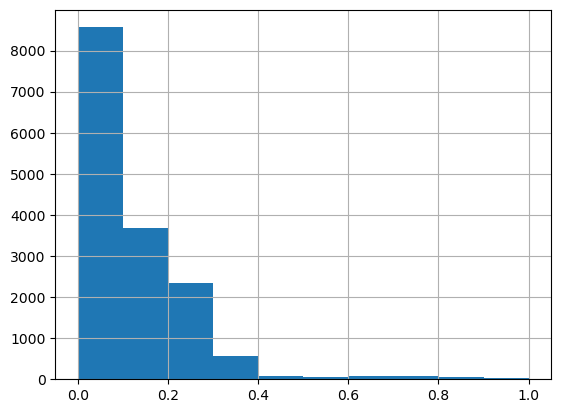

In [58]:
minmax_data["CyclinB"].hist()

<AxesSubplot: >

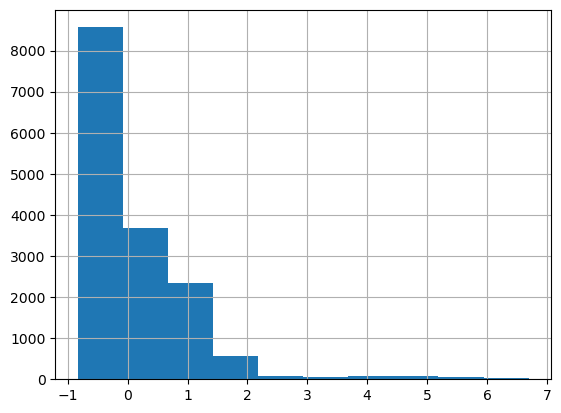

In [57]:
std_data["CyclinB"].hist()

In [136]:
fit_distribution(temp_data, "IdU")

(0.1088381860973155, 4.2501999999999995, 1.3965050842105153)

[7602, 4888, 2561, 208, 103, 38, 33, 26, 24, 16, 13]
[ 9436.59394461  9866.92705959 10118.62592164 10296.85311834
 10434.75839686 10547.14785326 10641.93109661 10723.83321935
 10795.90319747 10860.14402378 10918.20622494]
(5.151532244069108, 1.0348549527745172)

[7602, 4888, 2561, 208, 103, 38, 33, 26, 24, 16, 13]
[ 4034.42309669  8411.83807693 11230.32639876 12297.87902313
 12535.45048435 12566.45856963 12568.82745515 12568.93315237
 12568.93590096 12568.93594253 12568.9359429 ]
(182320563.10249984, 120775852.88368723, 120775848.12091735)

[7602, 4888, 2561, 208, 103, 38, 33, 26, 24, 16, 13]
[ 6153.29432183 10827.85233803 12793.22746588 13467.86809404
 13684.89367988 13753.29744484 13774.72008012 13781.41581454
 13783.50728909 13784.16000514 13784.36428295]


/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:707: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/dccstor/ipc1/.conda/envs/DREAM_analysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


(0.08942533733554985, 110.06507385113767, 4.2501999999999995, 1104.5622416308681)

[7602, 4888, 2561, 208, 103, 38, 33, 26, 24, 16, 13]
[12818.66718236 13557.64378812 13977.59207035 14262.14659415
 14471.28261457 14632.44704391 14760.57215815 14864.7029857
 14950.7368173  15022.6447115  15083.51741059]
(2.436743247892375, 4.143556820325845, 0.4136563824191575)

[7602, 4888, 2561, 208, 103, 38, 33, 26, 24, 16, 13]
[ 9784.20504976 12054.69854062 13033.61747156 13559.19368312
 13874.67503962 14077.37329745 14213.72839302 14308.54471071
 14376.14904094 14425.25133521 14461.57665927]
(4.2502, 8.4802)

[7602, 4888, 2561, 208, 103, 38, 33, 26, 24, 16, 13]
[ 1409.94901064  2820.2638617   4230.57871277  5640.89356383
  7051.2084149   8461.52326596  9871.83811703 11282.15296809
 12692.46781916 14100.95346808 15511.26831914]
(0.0965146626244612, 4.2501999999999995, 2.0638194626842763)

[7602, 4888, 2561, 208, 103, 38, 33, 26, 24, 16, 13]
[14361.81136261 14961.71120486 15214.32582862 15341.4565327

([33604594.82989173,
  45713363.586969316,
  54959152.906996995,
  64499931.32058198,
  59496687.561586,
  47854260.25305247,
  69566587.37771675,
  69478822.85952725,
  16803671.045804847,
  69377603.78237529,
  61445839.785404146],
 ['weibull_min',
  'norm',
  'weibull_max',
  'beta',
  'invgauss',
  'uniform',
  'gamma',
  'expon',
  'lognorm',
  'pearson3',
  'triang'])

In [72]:
cum_expected_frequency = np.array([0, 6205, 3101, 3103, 3103])
cum_observed_frequency = np.array([0, 6205, 9306, 12409, 15512])
sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)

/tmp/ipykernel_1285533/313557561.py:3: RuntimeWarning: invalid value encountered in divide
  sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)


nan

In [102]:
list((pd.cut(temp_data["IdU"], 10)).value_counts())

[8058, 5276, 1852, 110, 90, 33, 32, 24, 23, 14]

In [108]:
[i.right for i in pd.cut(temp_data["IdU"], 10).cat.categories]

[5.098, 5.946, 6.794, 7.642, 8.49, 9.338, 10.186, 11.034, 11.882, 12.73]

In [115]:
pd.cut(temp_data["IdU"], 10).cat.categories

IntervalIndex([(4.242, 5.098], (5.098, 5.946], (5.946, 6.794], (6.794, 7.642], (7.642, 8.49], (8.49, 9.338], (9.338, 10.186], (10.186, 11.034], (11.034, 11.882], (11.882, 12.73]], dtype='interval[float64, right]')